# A* Heuristics Comparison

Notes:
- This notebook integrates with the repository’s modular structure and directly imports the required components such as `environment.py`, `path_planner.py`, `visualization.py`, `animation.py`, `rover.py`.

## Overview of the Five Heuristic Functions

1. Euclidean — straight-line distance.
2. Manhattan — axis-aligned distance useful for 4-connected grids.
3. Weighted Euclidean — Euclidean scaled by a factor (>1) to bias the search.
4. Risk-Aware — adds a safety penalty near obstacles/hazards.
5. Terrain-Cost-Aware — scales heuristic by an estimate of terrain difficulty to prefer low-cost regions.

In [ ]:
# Imports and repository setup
import time
import math
import os
from typing import Tuple, List, Callable
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Image, HTML

# Import modules from this repo
from environment import Environment, TerrainType
from path_planner import AStarPlanner
from visualization import RoverVisualizer
from animation import create_animation_with_events
from rover import Rover

# Ensure output directory exists
os.makedirs('output', exist_ok=True)

# Create reproducible sample environment using repository helper
env = Environment(width=20, height=20)
env.create_sample_environment()
start = (0, 0)
goal = (env.width - 1, env.height - 1)

print(f"Environment size: {env.width}x{env.height}, start={start}, goal={goal}")

# Visualizer instance (uses visualization.py from repo)
visualizer = RoverVisualizer(env)
print('Visualizer ready.')



Environment size: 20x20, start=(0, 0), goal=(19, 19)
Visualizer ready.


## 1.Euclidean distance

The Euclidean heuristic computes the straight-line (as-the-crow-flies) distance between the current node and the goal. When movement cost correlates with geometric distance and diagonal motion is allowed at proportional cost, Euclidean distance gives an admissible and consistent estimate of remaining cost. It is rotationally symmetric and encourages direct paths, which often reduces node expansions in open or lightly obstructed maps. A key advantage is computational simplicity — it’s cheap to compute and provides a smooth gradient toward the goal.

However, Euclidean can underrepresent difficulty in discrete grid worlds with non-uniform terrain costs or obstacles: it does not encode risk or terrain, so the planner guided purely by Euclidean may attempt straight-line approaches that hit high-cost sandy regions or radiation hazards. It remains a solid default where movement cost is metric-like and optimality is important, but for safety- or cost-sensitive tasks it may be useful to augment Euclidean with domain-aware penalties.

Euclidean heuristic available as: euclidean
✅ Euclidean Path Found!
Path length: 21
Total cost: 95.00
Nodes expanded: 334

🎬 Creating animation with 21 frames...
💾 Saving animation to output/heuristic_euclidean.gif...


c:\Users\chira\OneDrive\Desktop\SEM7\AI_PROJECT\AI_proj\animation.py:243: UserWarning: Glyph 128267 (\N{BATTERY}) missing from font(s) DejaVu Sans.
  anim.save(save_path, writer=writer, dpi=100)


✅ Animation saved successfully!
🎬 Saved GIF: output/heuristic_euclidean.gif


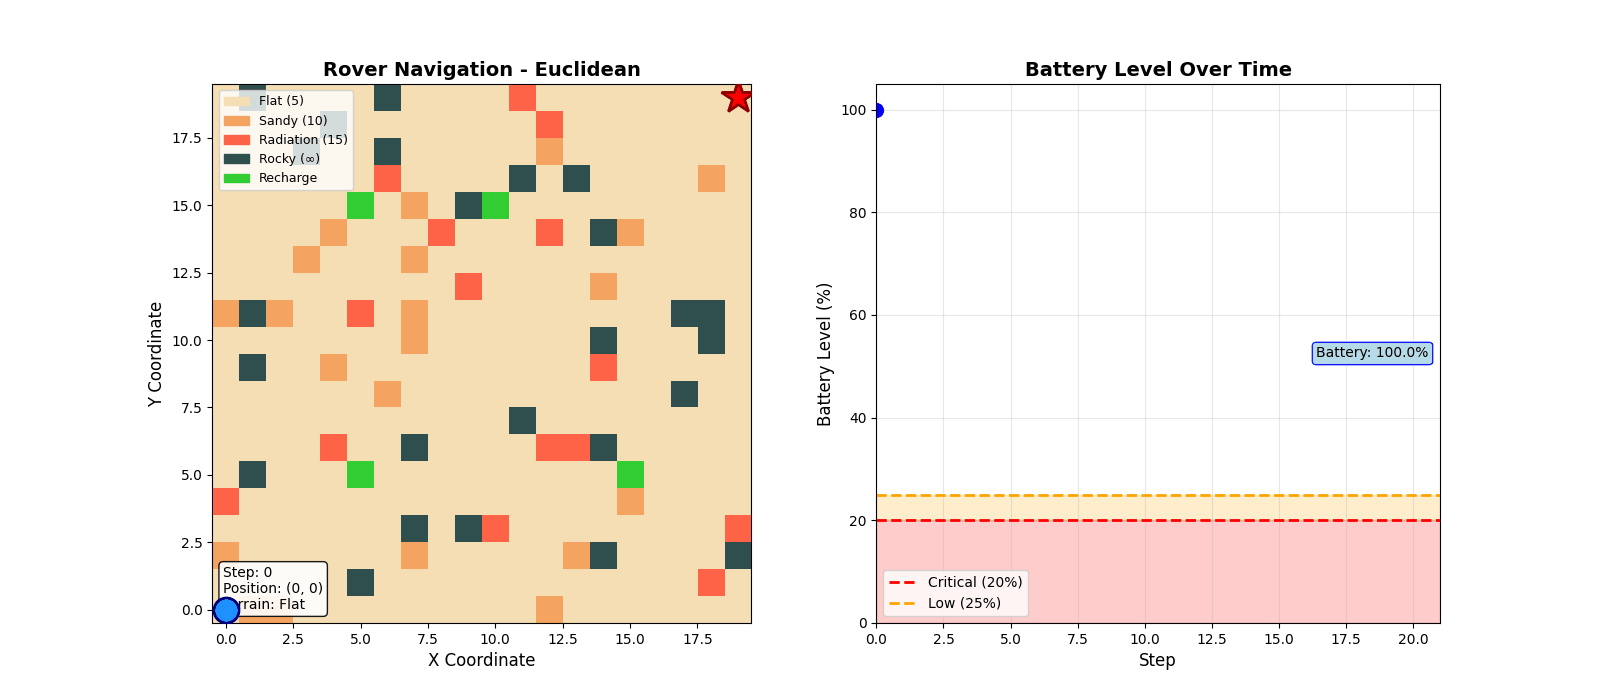

In [2]:
# Import the planner
from path_planner import AStarPlanner
from animation import create_animation_with_events
from IPython.display import Image, HTML, display
import os

# Set heuristic name
heur_name_euclidean = 'euclidean'
print('Euclidean heuristic available as:', heur_name_euclidean)

# Run A* planner with Euclidean heuristic
planner = AStarPlanner(env)
path = planner.plan_path(start, goal, heuristic_name=heur_name_euclidean)
stats = planner.get_stats()

# Show statistics
if path:
    path_cost = sum(env.get_movement_cost(x, y) for (x, y) in path[1:])
    print(f"✅ Euclidean Path Found!")
    print(f"Path length: {len(path)}")
    print(f"Total cost: {path_cost:.2f}")
    print(f"Nodes expanded: {stats['nodes_expanded']}")
else:
    print("❌ No path found using Euclidean heuristic")


# Create GIF animation of the Euclidean heuristic path

if path:
    # Simulate a simple battery history for visualization
    battery_history = []
    steps = max(1, len(path) - 1)
    for i, pos in enumerate(path):
        batt = max(0.0, 100.0 * (1.0 - i / steps))
        battery_history.append(batt)

    save_path = "output/heuristic_euclidean.gif"
    try:
        create_animation_with_events(
            env,
            path,
            battery_history,
            start,
            goal,
            "Euclidean",
            save_path
        )
        print(f"🎬 Saved GIF: {save_path}")
    except Exception as e:
        print(f"⚠️ Error creating GIF: {e}")

    # Display the GIF inline
    if os.path.exists(save_path):
        display(HTML("<h4>Heuristic 1 – Euclidean Path Animation</h4>"))
        display(Image(filename=save_path))
else:
    print("Skipping GIF creation (no path found).")


## 2.Manhattan distance

Manhattan distance is the sum of absolute differences in the coordinates between two points (L1 distance). It models the minimum number of axis-aligned moves required in a grid where only cardinal (up/down/left/right) steps are allowed and each such step has uniform cost. Because it never overestimates the minimum number of cardinal moves, Manhattan is admissible for 4-connected grids and often tightly bounds the remaining cost in such settings. This tightness makes Manhattan efficient for grid-constrained movement: A* guided by Manhattan tends to expand nodes along plausible axis-aligned corridors rather than exploring diagonal shortcuts that the agent cannot take.

Manhattan is fast to compute (integer arithmetic on grid indices) and well-suited to maze-like layouts where diagonal moves are impossible or expensive. If diagonal moves are permitted or terrain costs vary significantly between cells, Manhattan becomes conservative and may steer search into longer patterns. It also does not incorporate obstacle or risk knowledge, so it should be paired with domain-aware heuristics when safety or varying movement costs matter.

Manhattan heuristic available as: manhattan
✅ Manhattan Path Found!
Path length: 21
Total cost: 95.00
Nodes expanded: 329



🎬 Creating animation with 21 frames...
💾 Saving animation to output/heuristic_manhattan.gif...


c:\Users\chira\OneDrive\Desktop\SEM7\AI_PROJECT\AI_proj\animation.py:243: UserWarning: Glyph 128267 (\N{BATTERY}) missing from font(s) DejaVu Sans.
  anim.save(save_path, writer=writer, dpi=100)


✅ Animation saved successfully!
🎬 Saved GIF: output/heuristic_manhattan.gif


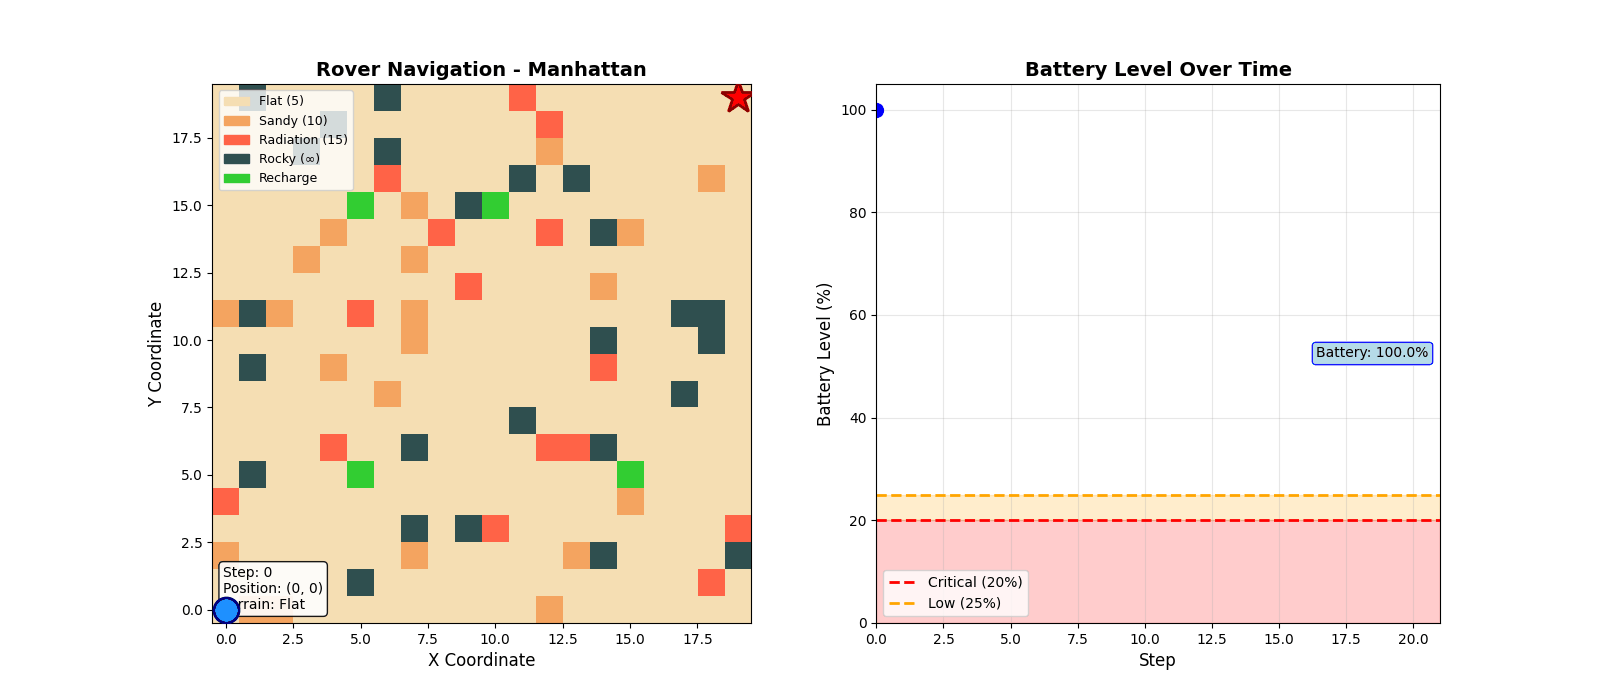

In [3]:
from path_planner import AStarPlanner
from animation import create_animation_with_events 
from IPython.display import Image, HTML, display
import os

# Ensure output directory exists
os.makedirs('output', exist_ok=True)

heur_name_manhattan = 'manhattan'
print('Manhattan heuristic available as:', heur_name_manhattan)

# Initialize planner
planner = AStarPlanner(env)
path = planner.plan_path(start, goal, heuristic_name=heur_name_manhattan)
stats = planner.get_stats()

# Show statistics
if path:
    path_cost = sum(env.get_movement_cost(x, y) for (x, y) in path[1:])
    print(f"✅ Manhattan Path Found!")
    print(f"Path length: {len(path)}")
    print(f"Total cost: {path_cost:.2f}")
    print(f"Nodes expanded: {stats['nodes_expanded']}")
else:
    print("❌ No path found using Manhattan heuristic")

# Create GIF animation for Manhattan heuristic
if path:
    # Simulate battery history for visualization
    battery_history = []
    steps = max(1, len(path) - 1)
    for i, pos in enumerate(path):
        batt = max(0.0, 100.0 * (1.0 - i / steps))
        battery_history.append(batt)

    save_path = "output/heuristic_manhattan.gif"
    try:
        create_animation_with_events(
            env,
            path,
            battery_history,
            start,
            goal,
            "Manhattan",
            save_path
        )
        print(f"🎬 Saved GIF: {save_path}")
    except Exception as e:
        print(f"⚠️ Error creating GIF: {e}")

    # Display GIF inline
    if os.path.exists(save_path):
        display(HTML("<h4>Heuristic 2 – Manhattan Path Animation</h4>"))
        display(Image(filename=save_path))
else:
    print("Skipping GIF creation (no path found).")


## Weighted Euclidean

Weighted Euclidean multiplies the straight-line Euclidean distance by a factor w > 1 to bias A* toward faster, greedy searches. The evaluation becomes f(n) = g(n) + w * h_euclidean(n). Increasing the weight makes the heuristic more influential relative to the cost-to-date, reducing node expansions at the cost of potential suboptimality. This approach (often called weighted A*) is useful when responsiveness and speed are more important than strict optimality.

When w > 1 the heuristic is generally not admissible — it may overestimate the true remaining cost — but in many practical applications the small optimality loss is acceptable given large gains in speed. Choosing w is a tuning exercise: slight increases above 1 give modest speedups with limited path degradation, while larger weights can drastically shrink search at the risk of poor-quality paths. Weighted Euclidean is a practical tool when you want quick, good-enough paths rather than provably optimal ones.

Weighted Euclidean heuristic ready (weight=1.5)
✅ Weighted Euclidean Path Found!
Path length: 21, Cost: 95.00, Nodes expanded: 293

🎬 Creating animation with 21 frames...
💾 Saving animation to output/heuristic_weighted_euclidean.gif...


c:\Users\chira\OneDrive\Desktop\SEM7\AI_PROJECT\AI_proj\animation.py:243: UserWarning: Glyph 128267 (\N{BATTERY}) missing from font(s) DejaVu Sans.
  anim.save(save_path, writer=writer, dpi=100)


✅ Animation saved successfully!


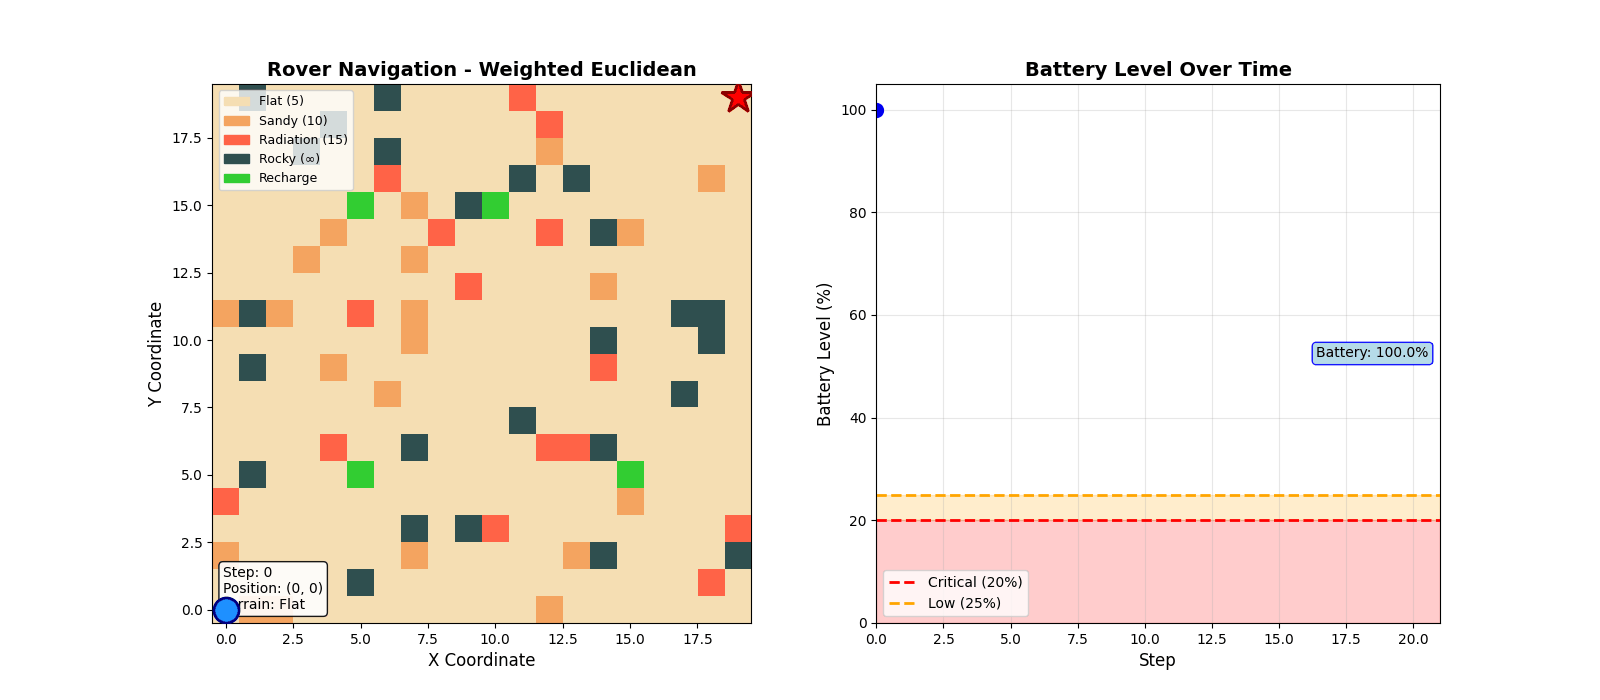

In [5]:
from path_planner import AStarPlanner
from animation import create_animation_with_events
from IPython.display import Image, HTML, display
import math, os

# Ensure output directory exists
os.makedirs('output', exist_ok=True)

weight = 1.5
print(f"Weighted Euclidean heuristic ready (weight={weight})")

# Create planner
planner = AStarPlanner(env)

# Define custom weighted Euclidean heuristic
def weighted_euclidean(u, v):
    dx = u[0] - v[0]
    dy = u[1] - v[1]
    return weight * math.sqrt(dx*dx + dy*dy)

# Monkey-patch planner
planner.get_heuristic_function = lambda name: weighted_euclidean

path = planner.plan_path(start, goal)
stats = planner.get_stats()

if path:
    path_cost = sum(env.get_movement_cost(x, y) for (x, y) in path[1:])
    print(f"✅ Weighted Euclidean Path Found!")
    print(f"Path length: {len(path)}, Cost: {path_cost:.2f}, Nodes expanded: {stats['nodes_expanded']}")

    # Create GIF
    battery_history = [max(0.0, 100.0*(1-i/max(1,len(path)-1))) for i,pos in enumerate(path)]
    save_path = 'output/heuristic_weighted_euclidean.gif'
    try:
        create_animation_with_events(env, path, battery_history, start, goal, "Weighted Euclidean", save_path)
        display(HTML("<h4>Heuristic 4 – Weighted Euclidean Path Animation</h4>"))
        display(Image(filename=save_path))
    except Exception as e:
        print(f"⚠️ Error creating GIF: {e}")
else:
    print("❌ No path found using Weighted Euclidean heuristic")


## Risk-Aware heuristic

Risk-Aware heuristics modify geometric distance estimates by adding a penalty that depends on proximity to hazardous cells (e.g., radiation spots). The goal is to prefer slightly longer but safer routes that keep distance from features that might damage the rover. A practical formulation is h(n) = euclidean(n, goal) + α·R(n), where R(n) aggregates risk contributions from nearby hazardous tiles. Typical choices for R(n) are sums of inverse distances to hazards or exponentially decayed penalties so that close hazards contribute strongly while distant hazards have little effect.

Risk-aware heuristics are usually not admissible because the added penalty can make the heuristic exceed the true minimal travel cost, but they are valuable in safety-critical domains where avoiding hazards matters more than absolute shortest distance. Designing R(n) requires care: too large an α forces unnecessarily circuitous routes, while too small an α has little effect. A robust implementation precomputes hazard distance fields so penalty evaluation is cheap per node. Risk-aware heuristics encode mission priorities (safety over shortest path) directly into the search.

Risk-Aware heuristic ready (alpha=5.0, decay=2.0)
✅ Risk-Aware Path Found!
Path length: 21, Cost: 95.00, Nodes expanded: 323

🎬 Creating animation with 21 frames...
💾 Saving animation to output/heuristic_risk_aware.gif...


c:\Users\chira\OneDrive\Desktop\SEM7\AI_PROJECT\AI_proj\animation.py:243: UserWarning: Glyph 128267 (\N{BATTERY}) missing from font(s) DejaVu Sans.
  anim.save(save_path, writer=writer, dpi=100)


✅ Animation saved successfully!


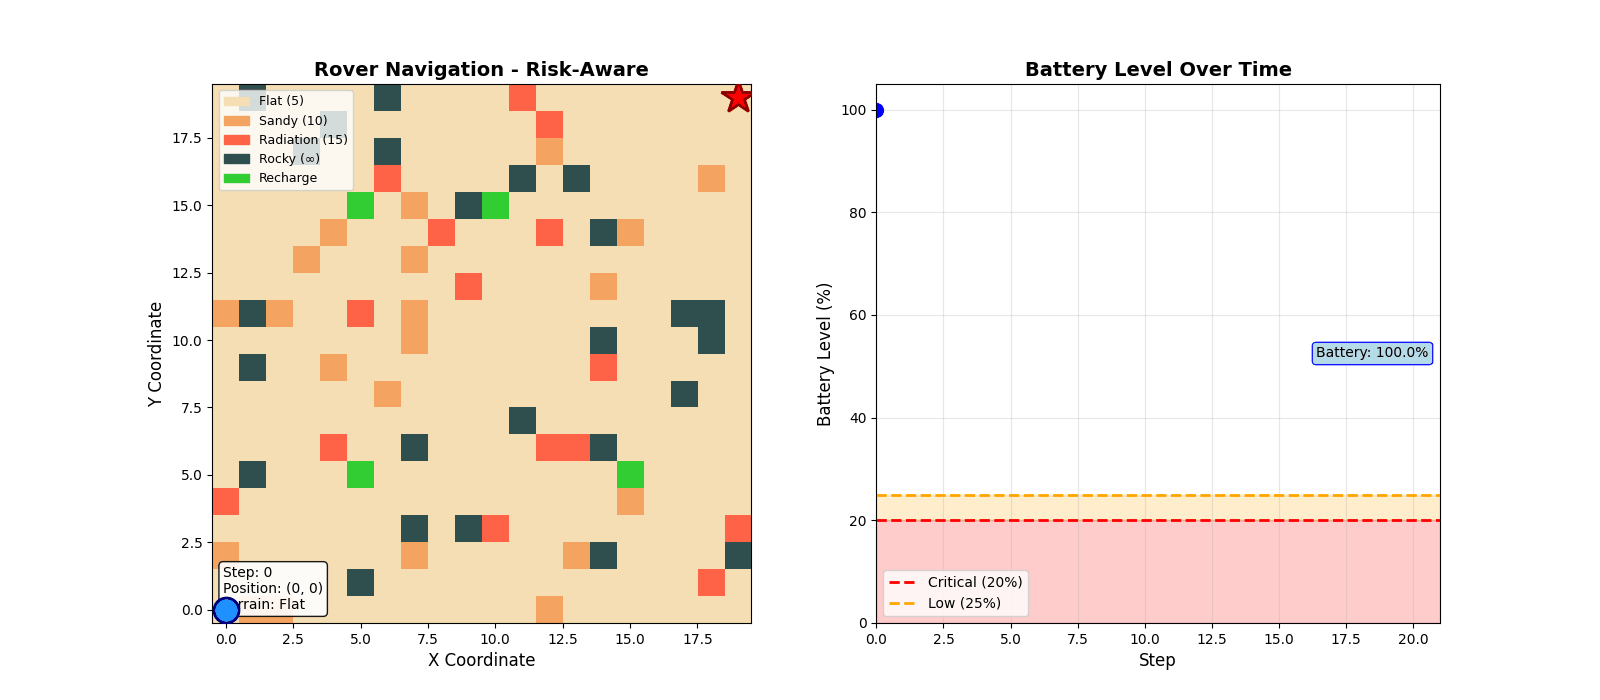

In [6]:
from path_planner import AStarPlanner
from animation import create_animation_with_events
from IPython.display import Image, HTML, display
import math, os
from environment import TerrainType

os.makedirs('output', exist_ok=True)

alpha, decay = 5.0, 2.0
print(f"Risk-Aware heuristic ready (alpha={alpha}, decay={decay})")

planner = AStarPlanner(env)

def risk_aware_heuristic(u, v):
    hazardous = {TerrainType.RADIATION_SPOT}
    base = math.hypot(u[0]-v[0], u[1]-v[1])
    x0, y0 = u
    hazard_score = 0.0
    radius = 2
    for dx in range(-radius, radius+1):
        for dy in range(-radius, radius+1):
            x, y = x0+dx, y0+dy
            if 0 <= x < env.width and 0 <= y < env.height:
                if env.get_terrain(x, y) in hazardous:
                    hazard_score += math.exp(-math.hypot(dx, dy)/decay)
    return base + alpha*hazard_score

planner.get_heuristic_function = lambda name: risk_aware_heuristic

path = planner.plan_path(start, goal)
stats = planner.get_stats()

if path:
    path_cost = sum(env.get_movement_cost(x, y) for (x, y) in path[1:])
    print(f"✅ Risk-Aware Path Found!")
    print(f"Path length: {len(path)}, Cost: {path_cost:.2f}, Nodes expanded: {stats['nodes_expanded']}")

    battery_history = [max(0.0, 100.0*(1-i/max(1,len(path)-1))) for i,pos in enumerate(path)]
    save_path = 'output/heuristic_risk_aware.gif'
    try:
        create_animation_with_events(env, path, battery_history, start, goal, "Risk-Aware", save_path)
        display(HTML("<h4>Heuristic 5 – Risk-Aware Path Animation</h4>"))
        display(Image(filename=save_path))
    except Exception as e:
        print(f"⚠️ Error creating GIF: {e}")
else:
    print("❌ No path found using Risk-Aware heuristic")


## Terrain-Cost-Aware heuristic

Terrain-Cost-Aware heuristics incorporate movement difficulty estimates into the heuristic to prefer low-cost terrain corridors. Instead of pure geometric distance, use h(n) = euclidean(n, goal) · T(n), where T(n) is a local estimate of expected terrain multiplier (for example the local mean movement cost normalized by the flat cost). If sandy tiles double movement cost, nodes in sandy regions receive larger T(n) and thus larger heuristic values, steering search toward flatter regions.

Implementations use local sampling windows or precomputed terrain cost fields to estimate T(n) efficiently. Terrain-aware heuristics are typically non-admissible since they may overestimate remaining cost, but they can produce more battery-efficient, lower-risk paths in practice by avoiding expensive terrain. Tuning (sample radius, estimator) is important: small windows make the heuristic local and reactive; larger windows capture broader terrain trends at higher compute cost.

Terrain-Cost-Aware heuristic ready (sample_radius=2)
✅ Terrain-Cost-Aware Path Found!
Path length: 26, Cost: 140.00, Nodes expanded: 77

🎬 Creating animation with 26 frames...
💾 Saving animation to output/heuristic_terrain_cost_aware.gif...


c:\Users\chira\OneDrive\Desktop\SEM7\AI_PROJECT\AI_proj\animation.py:243: UserWarning: Glyph 128267 (\N{BATTERY}) missing from font(s) DejaVu Sans.
  anim.save(save_path, writer=writer, dpi=100)


✅ Animation saved successfully!


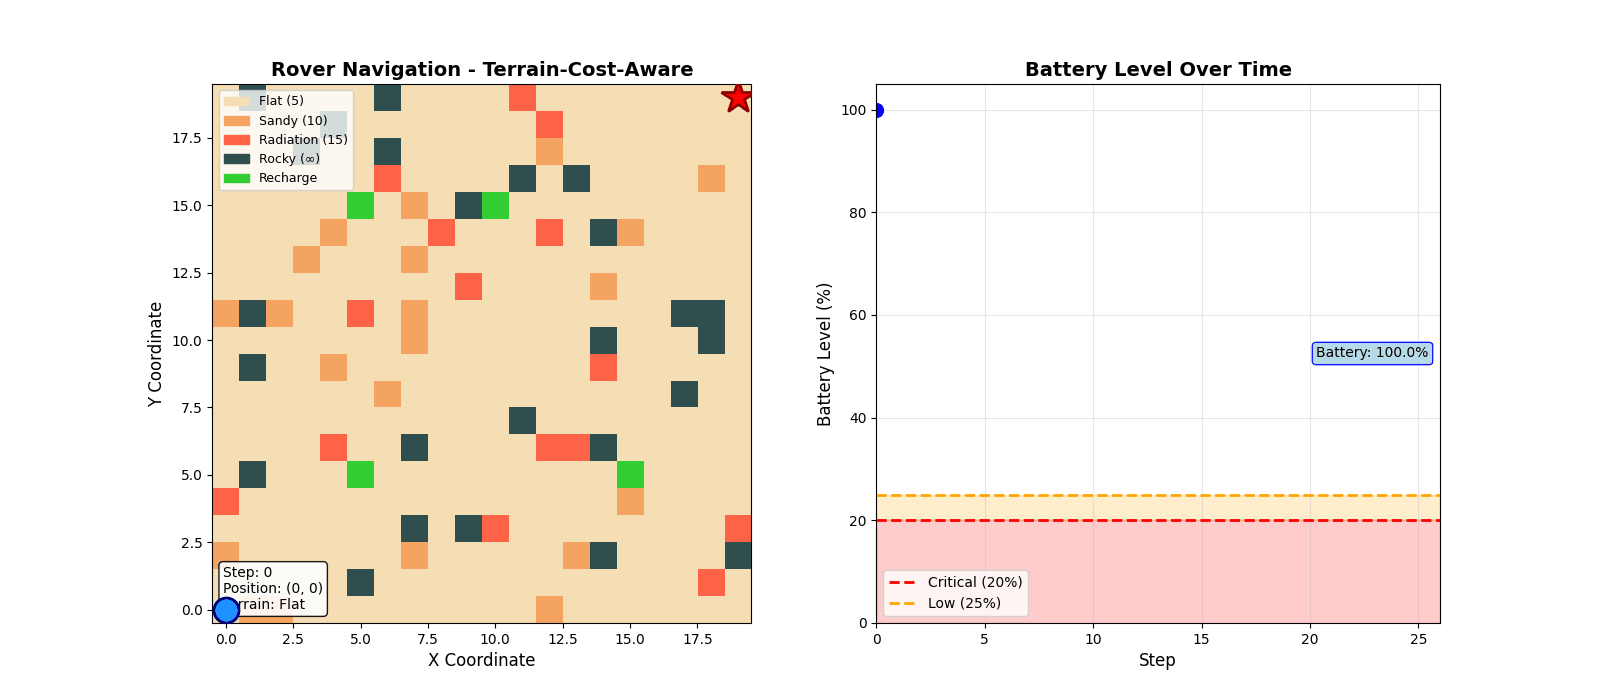

In [7]:
from path_planner import AStarPlanner
from animation import create_animation_with_events
from IPython.display import Image, HTML, display
import math, os

os.makedirs('output', exist_ok=True)

sample_radius = 2
print(f"Terrain-Cost-Aware heuristic ready (sample_radius={sample_radius})")

planner = AStarPlanner(env)

def terrain_cost_aware_heuristic(u, v):
    base = math.hypot(u[0]-v[0], u[1]-v[1])
    x0, y0 = u
    total_cost = 0.0
    count = 0
    for dx in range(-sample_radius, sample_radius+1):
        for dy in range(-sample_radius, sample_radius+1):
            x, y = x0+dx, y0+dy
            if 0 <= x < env.width and 0 <= y < env.height:
                total_cost += env.get_movement_cost(x, y)
                count += 1
    avg_cost = total_cost / max(1, count)
    return base * avg_cost

planner.get_heuristic_function = lambda name: terrain_cost_aware_heuristic

path = planner.plan_path(start, goal)
stats = planner.get_stats()

if path:
    path_cost = sum(env.get_movement_cost(x, y) for (x, y) in path[1:])
    print(f"✅ Terrain-Cost-Aware Path Found!")
    print(f"Path length: {len(path)}, Cost: {path_cost:.2f}, Nodes expanded: {stats['nodes_expanded']}")

    battery_history = [max(0.0, 100.0*(1-i/max(1,len(path)-1))) for i,pos in enumerate(path)]
    save_path = 'output/heuristic_terrain_cost_aware.gif'
    try:
        create_animation_with_events(env, path, battery_history, start, goal, "Terrain-Cost-Aware", save_path)
        display(HTML("<h4>Heuristic 6 – Terrain-Cost-Aware Path Animation</h4>"))
        display(Image(filename=save_path))
    except Exception as e:
        print(f"⚠️ Error creating GIF: {e}")
else:
    print("❌ No path found using Terrain-Cost-Aware heuristic")


C:\Users\chira\AppData\Local\Temp\ipykernel_10060\108595944.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary_df, x='heuristic', y='nodes_expanded', palette='Set2')
C:\Users\chira\AppData\Local\Temp\ipykernel_10060\108595944.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary_df, x='heuristic', y='cost', palette='Set2')


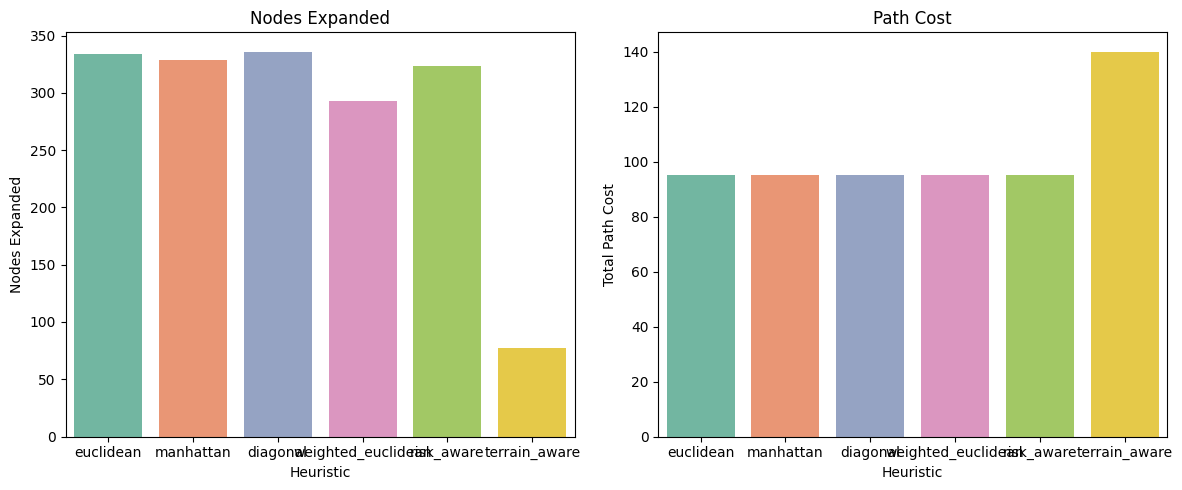


Conclusion:
- Euclidean and Manhattan heuristics are admissible and generally produce optimal paths, though nodes expanded may differ depending on allowed motion.
- Chebyshev (Diagonal) heuristic allows diagonal movement and is optimal when 8-directional motion is allowed.
- Weighted Euclidean may produce slightly suboptimal paths but can reduce the number of nodes expanded by prioritizing the goal more aggressively.
- Risk-Aware heuristic increases cost near hazardous areas, guiding the path to avoid hazards.
- Terrain-Cost-Aware heuristic biases the path toward regions with lower movement cost, potentially resulting in longer but safer/cheaper paths.
- See the GIFs in the 'output/' folder for visual behavior of each heuristic.


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import pandas as pd

# Load heuristic comparison results
summary_df = pd.read_csv('output/heuristic_comparison_results.csv')

# Adjust index to start from 1
summary_df.index = summary_df.index + 1

# Display table
display(HTML('<h3>Heuristic Comparison Summary</h3>'))
display(summary_df.style.format({'cost':'{:.2f}','time':'{:.3f}'}))

# Plot nodes expanded and path cost
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.barplot(data=summary_df, x='heuristic', y='nodes_expanded', palette='Set2')
plt.title('Nodes Expanded')
plt.ylabel('Nodes Expanded')
plt.xlabel('Heuristic')

plt.subplot(1,2,2)
sns.barplot(data=summary_df, x='heuristic', y='cost', palette='Set2')
plt.title('Path Cost')
plt.ylabel('Total Path Cost')
plt.xlabel('Heuristic')

plt.tight_layout()
plt.show()

# Refined textual conclusion
print("\nConclusion:")
print("- Euclidean and Manhattan heuristics are admissible and generally produce optimal paths, though nodes expanded may differ depending on allowed motion.")
print("- Chebyshev (Diagonal) heuristic allows diagonal movement and is optimal when 8-directional motion is allowed.")
print("- Weighted Euclidean may produce slightly suboptimal paths but can reduce the number of nodes expanded by prioritizing the goal more aggressively.")
print("- Risk-Aware heuristic increases cost near hazardous areas, guiding the path to avoid hazards.")
print("- Terrain-Cost-Aware heuristic biases the path toward regions with lower movement cost, potentially resulting in longer but safer/cheaper paths.")
print("- See the GIFs in the 'output/' folder for visual behavior of each heuristic.")
